# Data Description

You are provided with anime (Japanese animated media) information. Data from anime-planet on June 15 2020. 

> File: anime.csv

* **eps**: number of episodes (movies are considered 1 episode)
* **duration**: duration of episode
* **ongoing**: weather it is ongoing
* **startYr**: year that airing started
* **finishYr**: year that airing finished
* **sznOfRelease**: season of release (Winter, Spring, Fall)
* **description**: synopsis of plot
* **studios**: studios responsible for creation
* **tag**: tags, genres, etc. in total we have 32 tags
* **contentWarn**: content warning
* **watched**: number of users that completed it 
* **watching**: number of users that are watching it 
* **wantWatch**: number of users that want to watch it
* **dropped**: number of users that dropped it before completion
* **rating**: average user rating
* **votes**: number of votes that contribute to rating


In [43]:
# pip install --exists-action i --upgrade xgboost
# 

In [44]:
#import the libraries 

import numpy as np
import pandas as pd

# Supressing scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor, plot_importance
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

In [45]:
#load data and read the file 
anime = pd.read_csv("anime_data_raw.csv")
data=anime.copy()
# print(data.shape)

#. Check description
# data.describe().T

# check duplications 
data.duplicated()
print(data.duplicated().sum())
data[data.duplicated()] 
##no duplications

0


,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,...,tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others


In [46]:
data.sort_values("rating", ascending=False).head(10)

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,...,tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
0,Fullmetal Alchemist: Brotherhood,TV,64.00,NaN,False,2009.00,2010.00,Spring,The foundation of alchemy is based on the law ...,['Bones'],...,0,0,0,0,0,0,0,0,0,0
1,your name.,Movie,1.00,1hr 47min,False,2016.00,2016.00,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],...,0,0,0,0,0,0,0,0,0,0
2,A Silent Voice,Movie,1.00,2hr 10min,False,2016.00,2016.00,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],...,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.00,NaN,False,2016.00,2016.00,Fall,"Picking up where the second season ended, the ...",['Production I.G'],...,0,0,0,0,0,0,1,0,0,0
4,Attack on Titan 3rd Season: Part II,TV,10.00,NaN,False,2019.00,2019.00,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],...,0,0,0,0,0,0,0,0,0,0
5,Demon Slayer: Kimetsu no Yaiba,TV,26.00,NaN,False,2019.00,2019.00,Spring,"Bloodthirsty demons lurk in the woods, and nob...",['ufotable'],...,0,0,0,0,0,0,0,1,0,0
6,Haikyuu!! Second Season,TV,25.00,NaN,False,2015.00,2016.00,Fall,"After losing to Aoba Johsai at the Inter-High,...",['Production I.G'],...,0,0,0,0,0,0,1,0,0,0
7,Hunter x Hunter (2011),TV,148.00,NaN,False,2011.00,2014.00,Fall,"Drawn to the mystique of the unknown, Hunters ...",['MADHOUSE'],...,0,0,0,0,1,0,0,0,0,0
8,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Movie,1.00,1hr 51min,False,2013.00,2013.00,NaN,"While watching a movie, Gintoki comes upon a ""...",['Sunrise'],...,0,0,0,0,0,0,0,0,0,0
9,Gintama (2015),TV,51.00,NaN,False,2015.00,2016.00,Spring,Fourth season of Gintama.,['BN Pictures'],...,0,0,0,0,0,0,0,0,0,0


# Missing data

In [7]:
#check missing 
data.isnull().sum().sort_values(ascending = False)

sznOfRelease                    10811
description                      6405
duration                         5441
rating                           2471
votes                            2459
finishYr                          444
eps                               359
startYr                           222
watched                           222
mediaType                          68
title                               0
tag_'Supernatural'                  0
tag_'Magic'                         0
tag_'Slice of Life'                 0
tag_'Seinen'                        0
tag_'Animal Protagonists'           0
tag_'Mecha'                         0
tag_'School Life'                   0
tag_'CG Animation'                  0
tag_'Anthropomorphic'               0
tag_'Ecchi'                         0
tag_'Based on a Light Novel'        0
tag_'Shorts'                        0
tag_'Superpowers'                   0
tag_'Promotional'                   0
tag_'Sports'                        0
tag_'Histori

In [8]:
#check for no numerical missing
data.describe(exclude = np.number).T
#4808 missings in studions 

,count,unique,top,freq
title,14578,14578,Fullmetal Alchemist: Brotherhood,1
mediaType,14510,8,TV,4510
duration,9137,147,4min,964
ongoing,14578,2,False,14356
sznOfRelease,3767,4,Spring,1202
description,8173,8108,"In 19th century Belgium, in the Flanders count...",3
studios,14578,864,[],4808


## Dropping emptys in target "rating" and "title" 

In [9]:
data.dropna(subset=[ "rating"], inplace=True) 
## drop title letter- We are not using in the analysis 
data.drop(['title'], axis=1, inplace=True)

# drop title and description if we go for linear regression without description 
# df2.drop(["description", "title"], axis=1, inplace=True)

# percentage of missing
data.isna().sum() / data.shape[0] * 100 
print(data.isnull().sum().sort_values(ascending = False))
print(data.shape)

sznOfRelease                    8560
duration                        4636
description                     4474
finishYr                         121
watched                          115
mediaType                         63
startYr                            6
tag_'Mecha'                        0
tag_'Romance'                      0
tag_'School Life'                  0
tag_'Slice of Life'                0
tag_'Animal Protagonists'          0
tag_'Seinen'                       0
tag_'Supernatural'                 0
tag_'Magic'                        0
tag_'CG Animation'                 0
tag_'Anthropomorphic'              0
tag_'Ecchi'                        0
tag_'Based on a Light Novel'       0
tag_'Drama'                        0
tag_'Superpowers'                  0
tag_'Promotional'                  0
tag_'Sports'                       0
tag_'Historical'                   0
tag_'Vocaloid'                     0
tag_'Shorts'                       0
tag_'Original Work'                0
t

## studios 

In [10]:
#studios remove the brakets []
data["studios"] = data["studios"].str.lstrip("[").str.rstrip("]")
# mark as NaN if the value is a blank string
data["studios"] = data["studios"].replace( "", np.nan)  

#Fill missing values in the columns by 'Others'
data.studios.fillna("'Others'", inplace=True)
print(data.studios.isnull().sum())
data["studios"]

0


0                    'Bones'
1         'CoMix Wave Films'
2          'Kyoto Animation'
3           'Production I.G'
4               'Wit Studio'
                ...         
12717    'TMS Entertainment'
12832      'Fukushima Gaina'
13080               'Others'
13369               'Others'
13373    'Shin-Ei Animation'
Name: studios, Length: 12107, dtype: object

In [11]:
data.describe(exclude = np.number).T

,count,unique,top,freq
mediaType,12044,8,TV,3993
duration,7471,144,4min,844
ongoing,12107,2,False,11992
sznOfRelease,3547,4,Spring,1135
description,7633,7572,"In 19th century Belgium, in the Flanders count...",3
studios,12107,810,'Others',3214


In [12]:
#create a new variable to divide by , and the flat in one column with name "studios". Note the # of rows increase 
studio_df = pd.DataFrame(data.studios.str.split(", ", expand=True).values.flatten(), columns=["studios"]) 
#how many values count per studio
val_c = studio_df.studios.value_counts()
print(val_c.values, val_c)
#we take 200 as threshold, so we have the first 10 studios with 200 counts
threshold = 200
#create a list with the studios we want to consider, in this case with more than 100 counts
studios_list = val_c[val_c.values >= threshold].index.tolist()
print("Studio names taken into consideration:", len(studios_list), studios_list)

######################


studio_val = []

for i in range(data.shape[0]):  # iterate over all rows in data
    txt = data.studios.values[i]  # getting the values in studios column
    flag = 0  # flag variable
    for item in studios_list:  # iterate over the list of studios considered
        if item in txt and flag == 0:  # checking if studio name is in the row
            studio_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of studios considered
        studio_val.append("'Others'")

# we will strip the leading and trailing ', and assign the values to a column
data["studio_to_work"] = [item.strip("'") for item in studio_val]
data.tail()

print(data.studio_to_work.unique())

#Now, drop stuidos column 
data.drop("studios", axis=1, inplace=True)


[3214  636  433  341  339  319  279  266  223  216  194  167  165  146
  145  143  134  132  122  119  108   94   92   92   82   74   73   69
   69   68   64   64   60   59   57   54   53   53   51   50   50   49
   49   49   49   49   47   46   45   44   42   41   41   40   38   38
   37   37   36   36   35   35   34   34   33   32   31   30   30   30
   30   30   30   29   29   29   29   28   28   28   27   27   27   26
   25   24   24   24   23   22   22   21   21   21   21   20   19   19
   19   19   19   18   18   18   18   18   18   17   17   17   17   17
   16   16   16   16   16   16   15   15   15   14   14   14   14   14
   14   14   14   14   13   13   12   12   12   12   12   12   12   12
   11   11   11   11   11   10   10   10   10   10   10    9    9    9
    9    9    9    8    8    8    8    8    8    8    8    8    7    7
    7    7    7    7    7    7    7    7    7    7    7    6    6    6
    6    6    6    6    6    6    6    6    6    6    5    5    5    5
    5 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

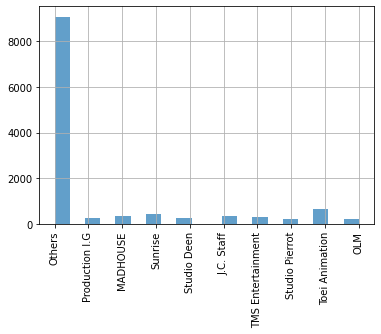

In [13]:
data.studio_to_work.hist(bins=20, alpha=0.7)
plt.xticks(rotation=90)


# startYear

In [14]:
#drop start years
data.dropna(subset=[ "startYr"], inplace=True) 

In [15]:
print(data.isnull().sum().sort_values(ascending = False))

print(data.shape)

sznOfRelease                    8554
duration                        4636
description                     4468
finishYr                         115
watched                          115
mediaType                         63
tag_'Mecha'                        0
tag_'Romance'                      0
tag_'School Life'                  0
tag_'Slice of Life'                0
tag_'Animal Protagonists'          0
tag_'Seinen'                       0
tag_'Supernatural'                 0
tag_'Magic'                        0
tag_'CG Animation'                 0
tag_'Anthropomorphic'              0
tag_'Ecchi'                        0
tag_'Based on a Light Novel'       0
tag_'Drama'                        0
tag_'Superpowers'                  0
tag_'Promotional'                  0
tag_'Sports'                       0
tag_'Historical'                   0
tag_'Vocaloid'                     0
tag_Others                         0
tag_'Shorts'                       0
tag_'Non-Human Protagonists'       0
t

# finishYr


In [16]:
data["finishYr"].fillna(2020, inplace=True)

# checking missing values in rest of the data
data.isnull().sum().sort_values(ascending = False)

sznOfRelease                    8554
duration                        4636
description                     4468
watched                          115
mediaType                         63
tag_'Mecha'                        0
tag_'Romance'                      0
tag_'School Life'                  0
tag_'Slice of Life'                0
tag_'Animal Protagonists'          0
tag_'Seinen'                       0
tag_'Supernatural'                 0
tag_'Magic'                        0
tag_'CG Animation'                 0
tag_'Anthropomorphic'              0
tag_'Ecchi'                        0
tag_'Based on a Light Novel'       0
tag_'Drama'                        0
tag_'Superpowers'                  0
tag_'Promotional'                  0
tag_'Sports'                       0
tag_'Historical'                   0
tag_'Vocaloid'                     0
tag_Others                         0
tag_'Shorts'                       0
tag_'Non-Human Protagonists'       0
tag_'Short Episodes'               0
v

# years_running

In [17]:
#Suggestion for class - reduction of columns categories 
data["years_running"] = data["finishYr"] - data["startYr"]
data.drop(["startYr", "finishYr"], axis=1, inplace=True)

In [18]:
data.shape

(12101, 46)

# MediaType & sznOfRelease

In [19]:
#fill mediaType with other
data.mediaType.fillna("Other", inplace=True)
# checking the number of unique values and the number of times they occur
data["sznOfRelease"].fillna("Unknown", inplace = True)
# print(data.isna().sum())
data.mediaType.value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           643
TV Special      504
Name: mediaType, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

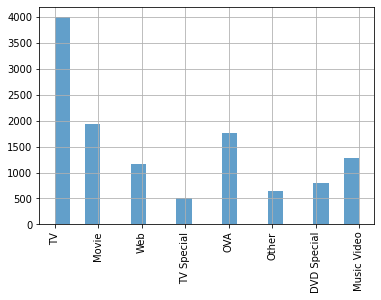

In [20]:
data.mediaType.hist(bins=20, alpha=0.7)
plt.xticks(rotation=90)


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

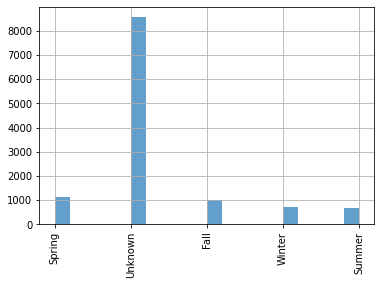

In [21]:
data.sznOfRelease.hist(bins=20, alpha=0.7)
plt.xticks(rotation=90)
# print(data.sznOfRelease.value_counts())

# duration 

In [22]:
# function from Marcelo
def time_to_minutes(var):
    if isinstance(var, str):  # checking if the value is string or not
        if "hr" in var:  # checking for the presence of hours in the duration
            spl = var.split(" ")  # splitting the value by space
            hr = (
                float(spl[0].replace("hr", "")) * 60
            )  # taking numeric part and converting hours to minutes
            mt = float(spl[1].replace("min", ""))  # taking numeric part of minutes
            return hr + mt
        else:
            return float(var.replace("min", ""))  # taking numeric part of minutes
    else:
        return np.nan  # will return NaN if value is not string

In [23]:
data["duration"] = data["duration"].apply(time_to_minutes)
data.duration.value_counts()
# print(data.isna().sum())

4.00      843
3.00      663
5.00      649
2.00      603
1.00      514
         ... 
136.00      1
162.00      1
123.00      1
127.00      1
138.00      1
Name: duration, Length: 144, dtype: int64

In [24]:
data[["duration", "watched"]] = data.groupby(["studio_to_work", "mediaType"])["duration", "watched"].transform(lambda x: x.fillna(x.median()))

Text(0, 0.5, 'Counts')

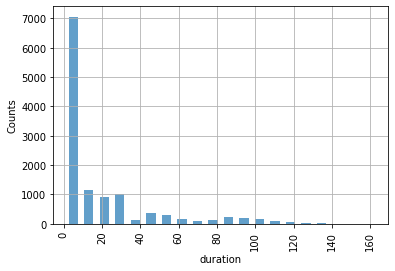

In [25]:

data.duration.hist(bins=20, alpha=0.7,rwidth=0.6 )
plt.xticks(rotation=90)
plt.xlabel('duration')
plt.ylabel('Counts')

24.00       125
19.00       116
20.00       116
18.00       103
26.00        99
           ... 
22158.00      1
3899.00       1
14486.00      1
17846.00      1
892.00        1
Name: watched, Length: 4311, dtype: int64


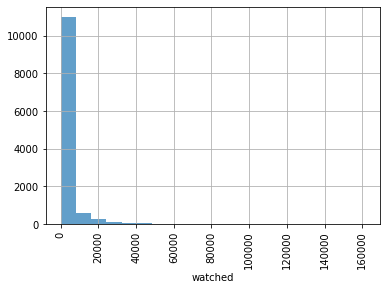

In [26]:
data.watched.hist(bins=20, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("watched")
print(data.watched.value_counts())

# description

In [27]:
data.description.drop_duplicates(inplace = True)
data.dropna(subset=[ "description"], inplace=True) 
data.reset_index(drop = True, inplace = True)
data.description

0       The foundation of alchemy is based on the law ...
1       Mitsuha and Taki are two total strangers livin...
2       After transferring into a new school, a deaf g...
3       Picking up where the second season ended, the ...
4       The battle to retake Wall Maria begins now! Wi...
                              ...                        
7628    In the year 2010 the Mars Exploration Vessel, ...
7629    Hovering above the streets of a futuristic Tok...
7630    The anime will feature an original story where...
7631    Princess Vanilla is a princess in a land of ic...
7632                     Second season of Xing Chen Bian.
Name: description, Length: 7633, dtype: object

### remove punctuation  

In [28]:
import string
string.punctuation

def remove_punctuation(txt):
    import string
    return txt.translate(str.maketrans("", "", string.punctuation)).lower()

In [29]:
data["description_no_puntuation"]=data["description"].apply(remove_punctuation)

In [30]:

data[["description_no_puntuation"]].duplicated().sum(), data.shape

(61, (7633, 47))

### remove stop words 

In [31]:
pip install --exists-action i --upgrade nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import nltk.corpus
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
# print(len(stop_words))
# sorted(stop_words)
not_stop_words = ["not", "no"]
stop_words_new = [x for x in stop_words if x not in not_stop_words]
# print(sorted(stop_words_new))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
data[data["description_no_puntuation"].isna()][["description", "description_no_puntuation"]]

,description,description_no_puntuation


In [34]:
data["description_Clean"] = data["description_no_puntuation"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_new)]))


# World Cloud


In [35]:
pip install --exists-action i --upgrade wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 7.6 MB/s 
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

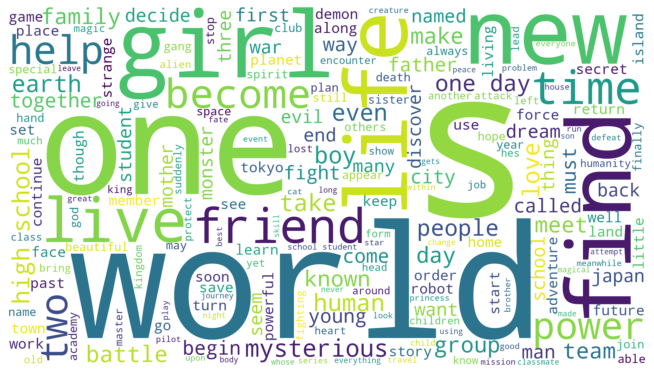

In [37]:
text = " ".join(txt for txt in data.description_Clean.astype(str))
wordcloud = WordCloud(background_color = "white", width = 1920, height = 1080).generate(text)

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [38]:

print(data.isnull().sum().sort_values(ascending = False), data.shape)

mediaType                       0
eps                             0
tag_'Romance'                   0
tag_'School Life'               0
tag_'Slice of Life'             0
tag_'Animal Protagonists'       0
tag_'Seinen'                    0
tag_'Supernatural'              0
tag_'Magic'                     0
tag_'CG Animation'              0
tag_'Mecha'                     0
tag_'Ecchi'                     0
tag_'Based on a Light Novel'    0
tag_'Anthropomorphic'           0
tag_'Superpowers'               0
tag_'Promotional'               0
tag_'Sports'                    0
tag_'Historical'                0
tag_'Vocaloid'                  0
tag_Others                      0
studio_to_work                  0
years_running                   0
description_no_puntuation       0
tag_'Shorts'                    0
tag_'Drama'                     0
tag_'Short Episodes'            0
rating                          0
duration                        0
ongoing                         0
sznOfRelease  

In [40]:
data.to_csv("anime_pre.csv", index=False)